In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling   #need to install using anaconda prompt (pip install pandas_profiling)
%pylab inline
plt.rcParams['figure.figsize'] = 10, 7.5
plt.rcParams['axes.grid'] = True
plt.gray()

Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\Anaconda3\lib\site-packages\pandas_profiling\plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\ProgramData\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\ProgramData\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\ProgramData\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 499, in start
    self.io_loop.start()
  File "C:\ProgramDa

<Figure size 720x540 with 0 Axes>

In [3]:
credit=pd.read_csv('agno next_CC GENERAL.csv',sep=',')

In [4]:
credit.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [5]:
credit.shape

(8950, 18)

In [6]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
CUST_ID                             8950 non-null object
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8949 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS            

In [7]:
import pandas_profiling

In [8]:
pandas_profiling.ProfileReport(credit)

Number of variables,18
Number of observations,8950
Total Missing (%),0.2%
Total size in memory,1.2 MiB
Average record size in memory,144.0 B
Numeric,16
Categorical,0
Boolean,0
Date,0
Text (Unique),1
Rejected,1


In [9]:
credit.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [10]:
credit['CREDIT_LIMIT'].isnull().mean()

0.000111731843575419

In [11]:
credit.MINIMUM_PAYMENTS.isnull().mean()

0.034972067039106144

# MISSING VALUE TREATMENT

In [12]:
credit['CREDIT_LIMIT']=credit['CREDIT_LIMIT'].fillna(credit['CREDIT_LIMIT'].median())

In [13]:
credit['MINIMUM_PAYMENTS']=credit['MINIMUM_PAYMENTS'].fillna(credit['MINIMUM_PAYMENTS'].median())

In [14]:
credit.isnull().sum()   #so there is no null value left

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

# DERIVING KPI

In [15]:
credit['Monthly_avg_purchase']=credit['PURCHASES']/credit['TENURE']

In [16]:
credit['Monthly_avg_purchase'].isnull().sum()

0

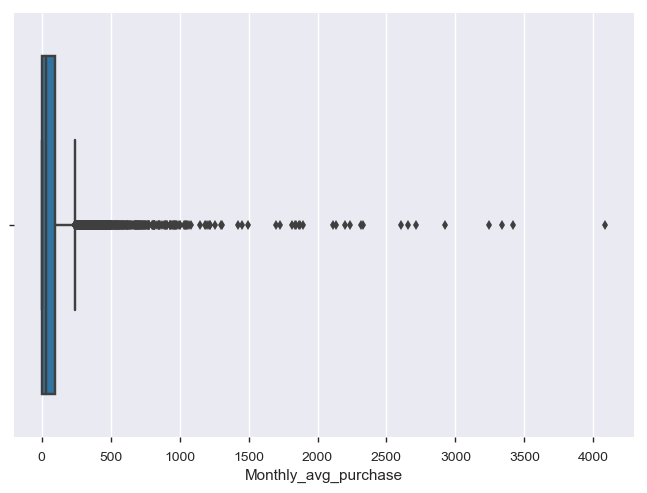

In [17]:
sns.boxplot(credit['Monthly_avg_purchase'])

In [18]:
credit['Monthly_cash_adv']=credit['CASH_ADVANCE']/credit['TENURE']

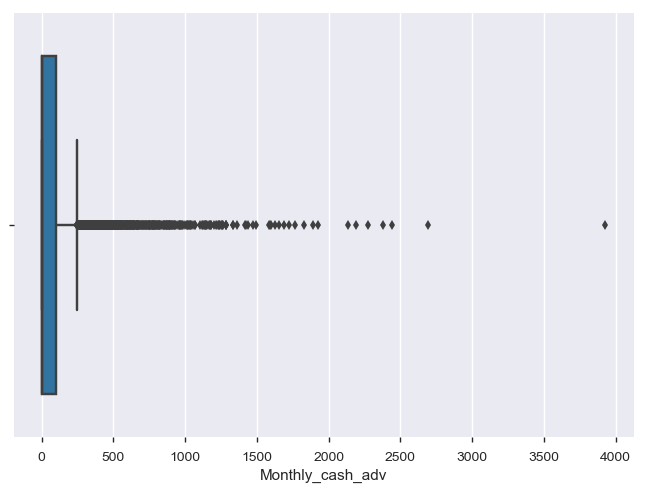

In [19]:
sns.boxplot(credit['Monthly_cash_adv'])

In [20]:
credit.INSTALLMENTS_PURCHASES

0         95.40
1          0.00
2          0.00
3          0.00
4          0.00
5       1333.28
6        688.38
7        436.20
8        200.00
9          0.00
10       920.12
11         0.00
12       717.76
13      1717.97
14         0.00
15      1611.70
16         0.00
17       519.00
18       338.35
19       398.64
20       176.68
21       449.91
22       815.90
23       793.79
24         0.00
25       399.60
26         0.00
27       233.28
28       182.50
29       100.00
         ...   
8920       0.00
8921      57.42
8922     145.98
8923     959.79
8924       0.00
8925     418.59
8926     580.00
8927     167.40
8928     500.00
8929       0.00
8930      84.00
8931     235.80
8932     180.00
8933     363.98
8934     110.50
8935     465.90
8936     712.50
8937       0.00
8938       0.00
8939       0.00
8940     591.24
8941     214.55
8942     113.28
8943       0.00
8944       0.00
8945     291.12
8946     300.00
8947     144.40
8948       0.00
8949       0.00
Name: INSTALLMENTS_PURCH

In [21]:
credit.iloc[:,[4,5]].head()


,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES
0,0.00,95.4
1,0.00,0.0
2,773.17,0.0
3,1499.00,0.0
4,16.00,0.0


# there are four types of purchase manner
1.Those customer only do one-off purchase
2.Those customer only do installement purchase
3.those customer who neither do installement nor do one-off purchase
4.Those customer who do both purchase

In [22]:
credit[credit['ONEOFF_PURCHASES']==0]['ONEOFF_PURCHASES'].count()

4302

In [23]:
credit[credit['INSTALLMENTS_PURCHASES']==0]['INSTALLMENTS_PURCHASES'].count()

3916

In [24]:
credit[credit['ONEOFF_PURCHASES']>0]['ONEOFF_PURCHASES'].count()

4648

In [25]:
credit[credit['INSTALLMENTS_PURCHASES']>0]['INSTALLMENTS_PURCHASES'].count()

5034

In [26]:
credit[(credit['ONEOFF_PURCHASES']>0) & (credit['INSTALLMENTS_PURCHASES']==0)].shape

(1874, 20)

In [27]:
credit[(credit['ONEOFF_PURCHASES']>0) & (credit['INSTALLMENTS_PURCHASES']>0)].shape

(2774, 20)

In [28]:
credit[(credit['ONEOFF_PURCHASES']==0) & (credit['INSTALLMENTS_PURCHASES']>0)].shape

(2260, 20)

In [29]:
#DERIVING CATEGORICAL VARIABLE BASED ON BEHAVIOR

In [30]:
def PURCHASES(credit):
    if (credit['ONEOFF_PURCHASES']==0) & (credit['INSTALLMENTS_PURCHASES']>0):
        return 'INSTALLMENTS_PURCHASES'
    if(credit['ONEOFF_PURCHASES']==0)  & (credit['INSTALLMENTS_PURCHASES']==0):
        return 'none'
    if(credit['ONEOFF_PURCHASES']>0)  & (credit['INSTALLMENTS_PURCHASES']==0):
        return 'ONEOFF_PURCHASES'
    if(credit['ONEOFF_PURCHASES']>0) & (credit['INSTALLMENTS_PURCHASES']>0):
        return 'both'
    

In [31]:
credit['Purchase_Type']=credit.apply(PURCHASES,axis=1)

In [32]:
credit.Purchase_Type.head()

0    INSTALLMENTS_PURCHASES
1                      none
2          ONEOFF_PURCHASES
3          ONEOFF_PURCHASES
4          ONEOFF_PURCHASES
Name: Purchase_Type, dtype: object

In [33]:
credit.Purchase_Type.value_counts()

both                      2774
INSTALLMENTS_PURCHASES    2260
none                      2042
ONEOFF_PURCHASES          1874
Name: Purchase_Type, dtype: int64

In [34]:
credit.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE',
       'Monthly_avg_purchase', 'Monthly_cash_adv', 'Purchase_Type'],
      dtype='object')

Limit Usage(balance to credit limit ratio)

In [35]:
credit['Limit_usage']=credit['BALANCE']/credit['CREDIT_LIMIT']
credit['Limit_usage'].head()

0    0.040901
1    0.457495
2    0.332687
3    0.222223
4    0.681429
Name: Limit_usage, dtype: float64

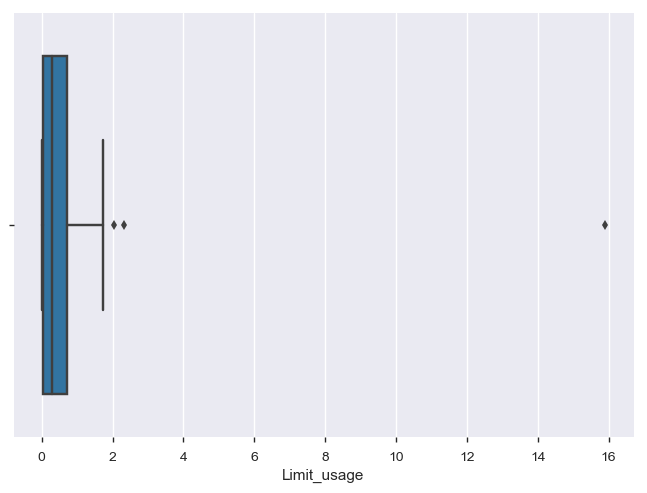

In [36]:
sns.boxplot(credit['Limit_usage'])

Payment to minimum payment ratio

In [37]:
credit['Payment_usage']=credit['PAYMENTS']/credit['MINIMUM_PAYMENTS']

In [38]:
credit['Payment_usage'].isnull().sum()

0

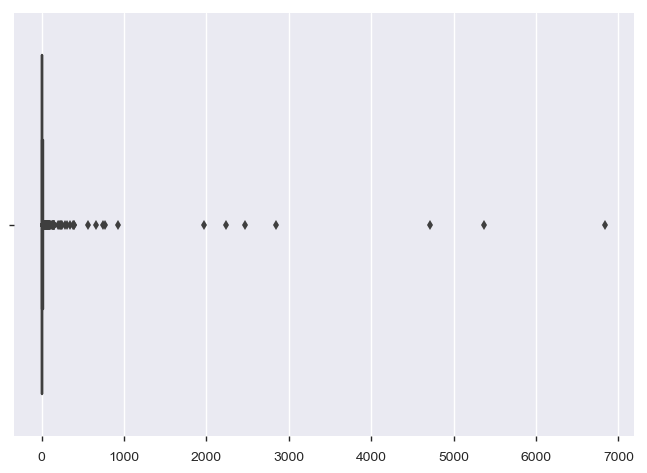

In [39]:
sns.boxplot([credit['Payment_usage']])

# Advance reporting:insights from derived KPI

In [40]:
#relationship between monthly_avg_purchase and Purchase_type

In [41]:
R=pd.DataFrame(credit.groupby(['Purchase_Type'])['Monthly_avg_purchase'].mean())
R

,Monthly_avg_purchase
Purchase_Type,
INSTALLMENTS_PURCHASES,46.974347
ONEOFF_PURCHASES,69.688958
both,192.685172
none,0.000000


In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5,1,'Average Monthly_avg_purchase with different type of purchase')

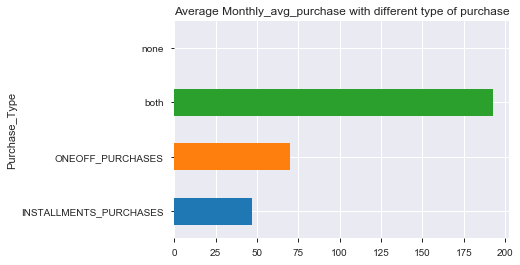

In [43]:
credit.groupby('Purchase_Type')['Monthly_avg_purchase'].mean().plot.barh()
plt.title('Average Monthly_avg_purchase with different type of purchase')

Insight1:
1.customer with oneoff and installment do highest purchase in the month
2.while those whose does not do one off and installement purchase has low interest to purchase in a month
3.we should use incentive to attract them

In [44]:
# relation between monthly_cash_adv and purchase_type 

In [45]:
R1=pd.DataFrame(credit.groupby('Purchase_Type')['Monthly_cash_adv'].mean())

In [46]:
R1

,Monthly_cash_adv
Purchase_Type,
INSTALLMENTS_PURCHASES,38.398206
ONEOFF_PURCHASES,78.995966
both,67.821985
none,182.858169


Text(0.5,1,'relationship between purchase_type and monthly_cash_adv')

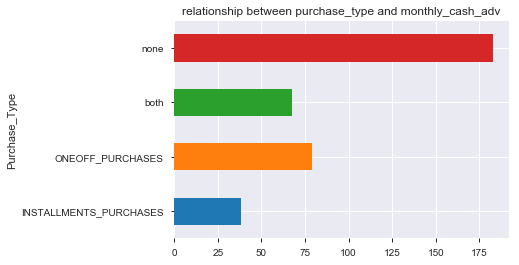

In [47]:
credit.groupby('Purchase_Type')['Monthly_cash_adv'].mean().plot.barh()
plt.title("relationship between purchase_type and monthly_cash_adv")

1.customer with no oneoff purchase and installment purchase tend to have monthly_cash_adv
2.we should provide some incentives to them


In [48]:
#relationship between purchase type and payment_usage

In [49]:
r=pd.DataFrame(credit.groupby(['Purchase_Type'])['Payment_usage'].mean())

In [50]:
r

,Payment_usage
Purchase_Type,
INSTALLMENTS_PURCHASES,13.259004
ONEOFF_PURCHASES,5.571082
both,7.236982
none,10.087451


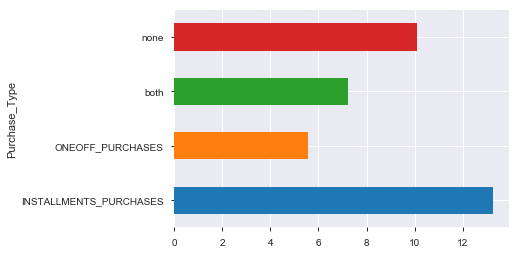

In [51]:
credit.groupby(['Purchase_Type'])['Payment_usage'].mean().plot.barh()

In [52]:
r4=credit.groupby(['Purchase_Type'])['Limit_usage'].mean()

In [53]:
r4

Purchase_Type
INSTALLMENTS_PURCHASES    0.271678
ONEOFF_PURCHASES          0.381074
both                      0.353548
none                      0.573771
Name: Limit_usage, dtype: float64

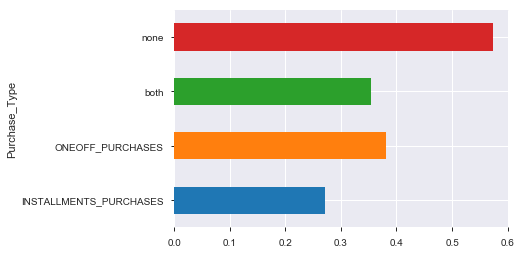

In [54]:
credit.groupby(['Purchase_Type'])['Limit_usage'].mean().plot.barh()

In [55]:
#individuals neither doing installement purchase neither one off purchase has highest limit_usage

In [56]:
#checking of outliers
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5,1,'Boxplot by Purchase_Type')

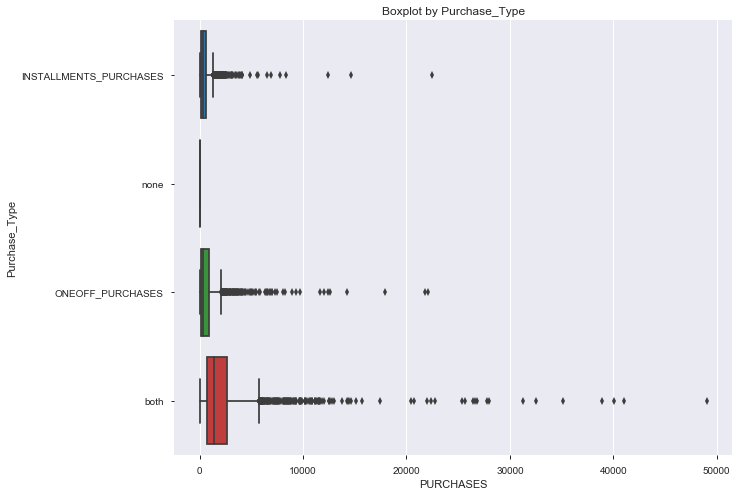

In [57]:
fig,axis=plt.subplots(figsize=(10,8))
sns.boxplot(x='PURCHASES',y='Purchase_Type',data=credit)
plt.title('Boxplot by Purchase_Type')

In [58]:
# there are many variables with extreme values ,so log transformation required to mitigate the extreme values

In [59]:
num_var=[key for key in dict(credit.dtypes) if dict(credit.dtypes)[key] in ['float64','float32','int64','int32']]
cat_var=[key for key in dict(credit.dtypes) if dict(credit.dtypes)[key] in ['object']]

In [60]:
print(num_var)

['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE', 'Monthly_avg_purchase', 'Monthly_cash_adv', 'Limit_usage', 'Payment_usage']


In [61]:
print(cat_var)

['CUST_ID', 'Purchase_Type']


In [62]:
credit_log=credit.drop(['CUST_ID','Purchase_Type'],axis=1).applymap(lambda x:np.log(x+1))

In [63]:
credit_log.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE', 'Monthly_avg_purchase', 'Monthly_cash_adv', 'Limit_usage',
       'Payment_usage'],
      dtype='object')

In [64]:
#creating dummies with categorical variable

In [65]:
dummy=pd.get_dummies(credit['Purchase_Type'],prefix='d')

In [66]:
dummy.head()

,d_INSTALLMENTS_PURCHASES,d_ONEOFF_PURCHASES,d_both,d_none
0,1,0,0,0
1,0,0,0,1
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


In [67]:
#with original dataset
credit_origin=pd.concat([credit,dummy],axis=1)

In [68]:
credit_origin.mean()

BALANCE                             1564.474828
BALANCE_FREQUENCY                      0.877271
PURCHASES                           1003.204834
ONEOFF_PURCHASES                     592.437371
INSTALLMENTS_PURCHASES               411.067645
CASH_ADVANCE                         978.871112
PURCHASES_FREQUENCY                    0.490351
ONEOFF_PURCHASES_FREQUENCY             0.202458
PURCHASES_INSTALLMENTS_FREQUENCY       0.364437
CASH_ADVANCE_FREQUENCY                 0.135144
CASH_ADVANCE_TRX                       3.248827
PURCHASES_TRX                         14.709832
CREDIT_LIMIT                        4494.282473
PAYMENTS                            1733.143852
MINIMUM_PAYMENTS                     844.906767
PRC_FULL_PAYMENT                       0.153715
TENURE                                11.517318
Monthly_avg_purchase                  86.175173
Monthly_cash_adv                      88.977984
Limit_usage                            0.388884
Payment_usage                          9

In [69]:
credit_original=pd.concat([credit_log,dummy],axis=1)

In [70]:
credit_original.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PRC_FULL_PAYMENT,TENURE,Monthly_avg_purchase,Monthly_cash_adv,Limit_usage,Payment_usage,d_INSTALLMENTS_PURCHASES,d_ONEOFF_PURCHASES,d_both,d_none
0,3.735304,0.597837,4.568506,0.000000,4.568506,0.000000,0.154151,0.000000,0.080042,0.000000,...,0.000000,2.564949,2.191654,0.000000,0.040086,0.894662,1,0,0,0
1,8.071989,0.646627,0.000000,0.000000,0.000000,8.770896,0.000000,0.000000,0.000000,0.223144,...,0.200671,2.564949,0.000000,6.287695,0.376719,1.574068,0,0,0,1
2,7.822504,0.693147,6.651791,6.651791,0.000000,0.000000,0.693147,0.693147,0.000000,0.000000,...,0.000000,2.564949,4.180994,0.000000,0.287197,0.688979,0,1,0,0
3,7.419183,0.492477,7.313220,7.313220,0.000000,5.331694,0.080042,0.080042,0.000000,0.080042,...,0.000000,2.564949,4.835620,2.898616,0.200671,0.000000,0,1,0,0
4,6.707735,0.693147,2.833213,2.833213,0.000000,0.000000,0.080042,0.080042,0.000000,0.000000,...,0.000000,2.564949,0.847298,0.000000,0.519644,1.327360,0,1,0,0


In [71]:
credit_original.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
Monthly_avg_purchase                0
Monthly_cash_adv                    0
Limit_usage                         0
Payment_usage                       0
d_INSTALLMENTS_PURCHASES            0
d_ONEOFF_PURCHASES                  0
d_both                              0
d_none                              0
dtype: int64

In [72]:
#getting rid of those variables which are used for deriving new kpi

In [73]:
credit_final=credit_original.drop(['PURCHASES','TENURE','CASH_ADVANCE','BALANCE','CREDIT_LIMIT','PAYMENTS','MINIMUM_PAYMENTS'],axis=1)

In [74]:
credit_original.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PRC_FULL_PAYMENT,TENURE,Monthly_avg_purchase,Monthly_cash_adv,Limit_usage,Payment_usage,d_INSTALLMENTS_PURCHASES,d_ONEOFF_PURCHASES,d_both,d_none
0,3.735304,0.597837,4.568506,0.000000,4.568506,0.000000,0.154151,0.000000,0.080042,0.000000,...,0.000000,2.564949,2.191654,0.000000,0.040086,0.894662,1,0,0,0
1,8.071989,0.646627,0.000000,0.000000,0.000000,8.770896,0.000000,0.000000,0.000000,0.223144,...,0.200671,2.564949,0.000000,6.287695,0.376719,1.574068,0,0,0,1
2,7.822504,0.693147,6.651791,6.651791,0.000000,0.000000,0.693147,0.693147,0.000000,0.000000,...,0.000000,2.564949,4.180994,0.000000,0.287197,0.688979,0,1,0,0
3,7.419183,0.492477,7.313220,7.313220,0.000000,5.331694,0.080042,0.080042,0.000000,0.080042,...,0.000000,2.564949,4.835620,2.898616,0.200671,0.000000,0,1,0,0
4,6.707735,0.693147,2.833213,2.833213,0.000000,0.000000,0.080042,0.080042,0.000000,0.000000,...,0.000000,2.564949,0.847298,0.000000,0.519644,1.327360,0,1,0,0


In [75]:
credit_final

,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,PRC_FULL_PAYMENT,Monthly_avg_purchase,Monthly_cash_adv,Limit_usage,Payment_usage,d_INSTALLMENTS_PURCHASES,d_ONEOFF_PURCHASES,d_both,d_none
0,0.597837,0.000000,4.568506,0.154151,0.000000,0.080042,0.000000,0.000000,1.098612,0.000000,2.191654,0.000000,0.040086,0.894662,1,0,0,0
1,0.646627,0.000000,0.000000,0.000000,0.000000,0.000000,0.223144,1.609438,0.000000,0.200671,0.000000,6.287695,0.376719,1.574068,0,0,0,1
2,0.693147,6.651791,0.000000,0.693147,0.693147,0.000000,0.000000,0.000000,2.564949,0.000000,4.180994,0.000000,0.287197,0.688979,0,1,0,0
3,0.492477,7.313220,0.000000,0.080042,0.080042,0.000000,0.080042,0.693147,0.693147,0.000000,4.835620,2.898616,0.200671,0.000000,0,1,0,0
4,0.693147,2.833213,0.000000,0.080042,0.080042,0.000000,0.000000,0.000000,0.693147,0.000000,0.847298,0.000000,0.519644,1.327360,0,1,0,0
5,0.693147,0.000000,7.196147,0.510826,0.000000,0.459532,0.000000,0.000000,2.197225,0.000000,4.719451,0.000000,0.695874,0.458438,1,0,0,0
6,0.693147,8.764620,6.535793,0.693147,0.693147,0.693147,0.000000,0.000000,4.174387,0.693147,6.383367,0.000000,0.045417,3.498984,0,0,1,0
7,0.693147,0.000000,6.080391,0.693147,0.000000,0.693147,0.000000,0.000000,2.564949,0.000000,3.620333,0.000000,0.583830,0.822576,1,0,0,0
8,0.693147,6.496005,5.303305,0.287682,0.080042,0.223144,0.000000,0.000000,1.791759,0.000000,4.287590,0.000000,0.135395,1.165111,0,0,1,0
9,0.435318,7.156645,0.000000,0.154151,0.154151,0.000000,0.000000,0.000000,1.386294,0.000000,4.680278,0.000000,0.013744,2.534697,0,1,0,0


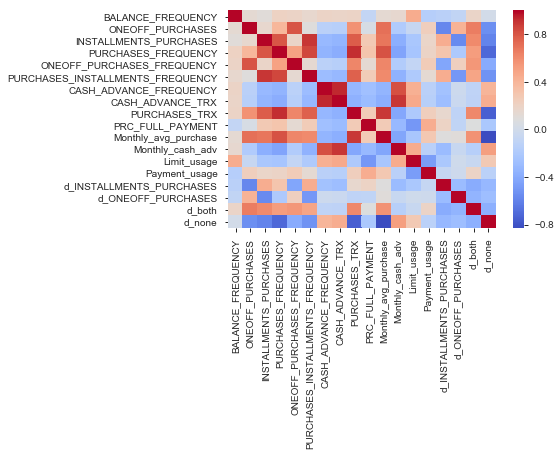

In [76]:
sns.heatmap(credit_final.corr(),cmap='coolwarm')

In [77]:
credit_final.shape

(8950, 18)

In [78]:
#Standardizing Data

In [79]:
from sklearn.preprocessing import StandardScaler

In [80]:
sc=StandardScaler()
credit_scaled=sc.fit_transform(credit_final)
credit_scaled

array([[-0.14875746, -0.98708958,  0.39447984, ..., -0.514625  ,
        -0.67019253, -0.54369045],
       [ 0.17961568, -0.98708958, -1.08745376, ..., -0.514625  ,
        -0.67019253,  1.83928189],
       [ 0.49271003,  1.06202168, -1.08745376, ...,  1.94316249,
        -0.67019253, -0.54369045],
       ...,
       [-0.09290575, -0.98708958,  0.52779444, ..., -0.514625  ,
        -0.67019253, -0.54369045],
       [-0.09290575, -0.98708958, -1.08745376, ..., -0.514625  ,
        -0.67019253,  1.83928189],
       [-0.73437135,  1.16861854, -1.08745376, ...,  1.94316249,
        -0.67019253, -0.54369045]])

In [81]:
credit_scaled=pd.DataFrame(credit_scaled)

In [82]:
credit_scaled

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,-0.148757,-0.987090,0.394480,-0.746901,-0.732480,-0.674253,-0.724360,-0.810069,-0.579510,-0.556368,-0.429030,-0.890667,-1.022796,-0.492437,1.720516,-0.514625,-0.670193,-0.543690
1,0.179616,-0.987090,-1.087454,-1.302799,-0.732480,-0.958256,0.699592,0.784603,-1.379210,0.391958,-1.523373,1.697282,0.322182,0.230261,-0.581221,-0.514625,-0.670193,1.839282
2,0.492710,1.062022,-1.087454,1.196820,2.466762,-0.958256,-0.724360,-0.810069,0.487865,-0.556368,0.564294,-0.890667,-0.035495,-0.711225,-0.581221,1.943162,-0.670193,-0.543690
3,-0.857867,1.265778,-1.087454,-1.014151,-0.363042,-0.958256,-0.213583,-0.123281,-0.874655,-0.556368,0.891164,0.302372,-0.381199,-1.444107,-0.581221,1.943162,-0.670193,-0.543690
4,0.492710,-0.114307,-1.087454,-1.014151,-0.363042,-0.958256,-0.724360,-0.810069,-0.874655,-0.556368,-1.100298,-0.890667,0.893219,-0.032167,-0.581221,1.943162,-0.670193,-0.543690
5,0.492710,-0.987090,1.246835,0.539335,-0.732480,0.672236,-0.724360,-0.810069,0.220191,-0.556368,0.833158,-0.890667,1.597325,-0.956457,1.720516,-0.514625,-0.670193,-0.543690
6,0.492710,1.712887,1.032629,1.196820,2.466762,1.501139,-0.724360,-0.810069,1.659405,2.719298,1.663990,-0.890667,-1.001500,2.277834,-0.581221,-0.514625,1.492109,-0.543690
7,0.492710,-0.987090,0.884905,1.196820,-0.732480,1.501139,-0.724360,-0.810069,0.487865,-0.556368,0.284343,-0.890667,1.149669,-0.569116,1.720516,-0.514625,-0.670193,-0.543690
8,0.492710,1.014031,0.632834,-0.265364,-0.363042,-0.166508,-0.724360,-0.810069,-0.074955,-0.556368,0.617520,-0.890667,-0.642000,-0.204754,-0.581221,-0.514625,1.492109,-0.543690
9,-1.242561,1.217544,-1.087454,-0.746901,-0.020992,-0.958256,-0.724360,-0.810069,-0.370100,-0.556368,0.813598,-0.890667,-1.128045,1.252102,-0.581221,1.943162,-0.670193,-0.543690


# Applying PCA

In [83]:
from sklearn.decomposition import PCA

In [84]:
var_ratio={}
for n in range(2,19):
    pc=PCA(n_components=n)
    credit_pca=pc.fit(credit_scaled)
    var_ratio[n]=sum(credit_pca.explained_variance_ratio_)
var_ratio    

{2: 0.5618818632071939,
 3: 0.7017091946602487,
 4: 0.7879215579897093,
 5: 0.8509051128049872,
 6: 0.8981298669161916,
 7: 0.9250500263596622,
 8: 0.9449979758778909,
 9: 0.9638401466961728,
 10: 0.9754835332904721,
 11: 0.984544891336271,
 12: 0.9903259946876042,
 13: 0.9931878396175078,
 14: 0.9956733236487912,
 15: 0.9980917440976621,
 16: 0.9996566575330124,
 17: 0.9999999999999999,
 18: 0.9999999999999999}

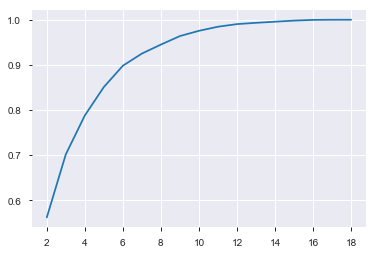

In [85]:
pd.Series(var_ratio).plot()

In [86]:
#since 5 factors are explaining more than 85 percent of variance 

In [113]:
pc_final=PCA(n_components=5).fit(credit_scaled)
pc_final.components_.T
pc_final.explained_variance_

array([6.98234532, 3.13265839, 2.51717321, 1.55199595, 1.13383067])

In [88]:
reduced_cr=pc_final.fit_transform(credit_scaled)

In [89]:
pd.DataFrame(reduced_cr)

,0,1,2,3,4
0,-0.286672,-2.636484,0.134143,-0.875332,-0.080491
1,-3.859047,-0.102302,-0.398406,1.422064,-0.408851
2,1.164233,1.568055,2.671075,-1.924379,0.367884
3,-1.135469,0.665804,2.455836,-1.469237,0.816375
4,-1.520933,-0.180685,2.200903,-1.748383,-0.241108
5,1.063761,-1.639396,-1.750734,-2.384565,0.105318
6,5.102193,1.216898,0.777356,2.560782,-0.338924
7,1.444133,-1.828717,-1.894053,-2.015174,0.215346
8,1.417798,0.322567,0.428405,-0.352657,-1.617814
9,0.176641,-0.118609,3.692814,-0.022994,0.591903


In [90]:
#Loading Matrix
col=credit_final.columns

In [91]:
Loadings=pd.DataFrame((pc_final.components_.T*np.sqrt(pc_final.explained_variance_)).T,columns=col).T
Loadings

,0,1,2,3,4
BALANCE_FREQUENCY,0.064608,0.443180,-0.399201,-0.269522,-0.074878
ONEOFF_PURCHASES,0.543469,0.710808,0.404532,-0.011563,-0.034714
INSTALLMENTS_PURCHASES,0.814197,-0.127839,-0.514123,0.064477,-0.039473
PURCHASES_FREQUENCY,0.900867,0.062852,-0.264773,-0.063321,0.140336
ONEOFF_PURCHASES_FREQUENCY,0.551850,0.628523,0.287767,0.069739,-0.043870
PURCHASES_INSTALLMENTS_FREQUENCY,0.770744,-0.150395,-0.538668,0.010311,0.012725
CASH_ADVANCE_FREQUENCY,-0.568919,0.490494,-0.399773,0.235078,0.363305
CASH_ADVANCE_TRX,-0.609002,0.500251,-0.409611,0.237762,0.332131
PURCHASES_TRX,0.921735,0.220132,-0.163599,-0.053724,0.116226
PRC_FULL_PAYMENT,0.411072,-0.291208,0.132738,0.520102,0.169021


In [92]:
#factor analysis
pd.Series(pc_final.explained_variance_ratio_,index=['PC_'+str(i) for i in range(5)])

PC_0    0.387865
PC_1    0.174017
PC_2    0.139827
PC_3    0.086212
PC_4    0.062984
dtype: float64

In [93]:
# Key performace variable selection.Dropping those varibales which are used in derving new KPI & variables which are highly correlated  
list_var=['CASH_ADVANCE_TRX','PURCHASES_TRX','PRC_FULL_PAYMENT',
          'Monthly_avg_purchase','Monthly_cash_adv','Limit_usage','Payment_usage',
         'd_both','d_INSTALLMENTS_PURCHASES','d_none','d_ONEOFF_PURCHASES']

In [94]:
credit_final1=credit_final[list_var]
credit_final1

,CASH_ADVANCE_TRX,PURCHASES_TRX,PRC_FULL_PAYMENT,Monthly_avg_purchase,Monthly_cash_adv,Limit_usage,Payment_usage,d_both,d_INSTALLMENTS_PURCHASES,d_none,d_ONEOFF_PURCHASES
0,0.000000,1.098612,0.000000,2.191654,0.000000,0.040086,0.894662,0,1,0,0
1,1.609438,0.000000,0.200671,0.000000,6.287695,0.376719,1.574068,0,0,1,0
2,0.000000,2.564949,0.000000,4.180994,0.000000,0.287197,0.688979,0,0,0,1
3,0.693147,0.693147,0.000000,4.835620,2.898616,0.200671,0.000000,0,0,0,1
4,0.000000,0.693147,0.000000,0.847298,0.000000,0.519644,1.327360,0,0,0,1
5,0.000000,2.197225,0.000000,4.719451,0.000000,0.695874,0.458438,0,1,0,0
6,0.000000,4.174387,0.693147,6.383367,0.000000,0.045417,3.498984,1,0,0,0
7,0.000000,2.564949,0.000000,3.620333,0.000000,0.583830,0.822576,0,1,0,0
8,0.000000,1.791759,0.000000,4.287590,0.000000,0.135395,1.165111,1,0,0,0
9,0.000000,1.386294,0.000000,4.680278,0.000000,0.013744,2.534697,0,0,0,1


In [95]:
#clustering
from sklearn.cluster import KMeans

In [115]:
km_3=KMeans(n_clusters=3,random_state=123)
km_3.fit(reduced_cr)
km_3.labels_
km_3


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=123, tol=0.0001, verbose=0)

In [97]:
pd.Series(km_3.labels_).value_counts()

0    3409
1    3345
2    2196
dtype: int64

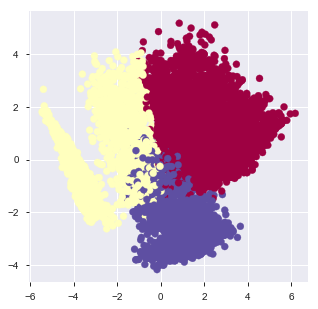

In [98]:
plt.figure(figsize=(5,5))
plt.scatter(reduced_cr[:,0],reduced_cr[:,1],c=km_3.labels_,cmap='Spectral')

In [99]:
# save the cluster labels and sort by cluster
credit_final1['cluster_3'] = km_3.labels_

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [100]:
#4 clusters
km_4=KMeans(n_clusters=4,random_state=123).fit(reduced_cr)

#5 clusters
km_5=KMeans(n_clusters=5,random_state=123).fit(reduced_cr)

#6 clusters
km_6=KMeans(n_clusters=6,random_state=123).fit(reduced_cr)

#7 clusters
km_7=KMeans(n_clusters=7,random_state=123).fit(reduced_cr)

#8 clusters
km_8=KMeans(n_clusters=8,random_state=123).fit(reduced_cr)


In [101]:
# save the cluster labels and sort by cluster
credit_final1['cluster_4'] = km_4.labels_
credit_final1['cluster_5'] = km_5.labels_
credit_final1['cluster_6'] = km_6.labels_
credit_final1['cluster_7'] = km_7.labels_
credit_final1['cluster_8'] = km_8.labels_

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [102]:
pd.Series.sort_index(credit_final1.cluster_3.value_counts())

0    3409
1    3345
2    2196
Name: cluster_3, dtype: int64

In [103]:
pd.Series(credit_final1.cluster_3.size)

0    8950
dtype: int64

In [104]:
size=pd.concat([pd.Series(credit_final1.cluster_3.size), pd.Series.sort_index(credit_final1.cluster_3.value_counts()), pd.Series.sort_index(credit_final1.cluster_4.value_counts()),
           pd.Series.sort_index(credit_final1.cluster_5.value_counts()), pd.Series.sort_index(credit_final1.cluster_6.value_counts()),
           pd.Series.sort_index(credit_final1.cluster_7.value_counts()), pd.Series.sort_index(credit_final1.cluster_8.value_counts())])

In [105]:
size

0    8950
0    3409
1    3345
2    2196
0    1875
1    2102
2    2756
3    2217
0    1862
1     929
2    1973
3    2096
4    2090
0    1952
1    2084
2    2110
3     703
4     918
5    1183
0    1182
1     754
2     855
3    1502
4    2050
5    1904
6     703
0     753
1     703
2    1140
3    2050
4     868
5     755
6    1502
7    1179
dtype: int64

In [106]:
#Applying Herarchical Clustering

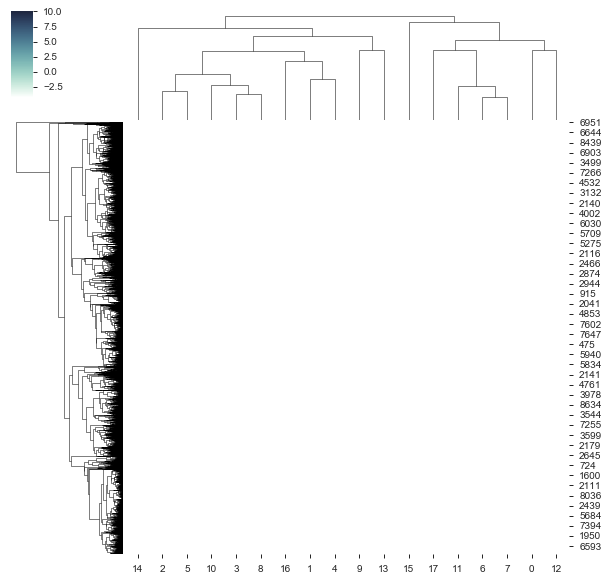

In [107]:
# Dendogram

cmap = sns.cubehelix_palette(as_cmap=True, rot=-.3, light=1)
g = sns.clustermap(credit_scaled, cmap=cmap, linewidths=.5)

In [108]:
# calculate for k=3 through k=8
cluster_range = range(1,20)
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans( num_clusters )
    clusters.fit_transform(reduced_cr )
    cluster_errors.append( clusters.inertia_ )
    
cluster_errors

[137080.81367288355,
 89761.39301077918,
 67204.61111811637,
 46452.7705443265,
 39552.785160205414,
 34670.74485513891,
 30627.01030296293,
 28056.53750134207,
 25261.91235876458,
 23223.75250815905,
 21641.37766053878,
 19800.050748581147,
 18683.36027211734,
 17496.579491901255,
 16753.772940476952,
 15703.977658150217,
 15099.136141015617,
 14588.040580164057,
 13937.972438500165]

In [116]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

clusters_df[0:10]

,num_clusters,cluster_errors
0,1,137080.813673
1,2,89761.393011
2,3,67204.611118
3,4,46452.770544
4,5,39552.785160
5,6,34670.744855
6,7,30627.010303
7,8,28056.537501
8,9,25261.912359
9,10,23223.752508


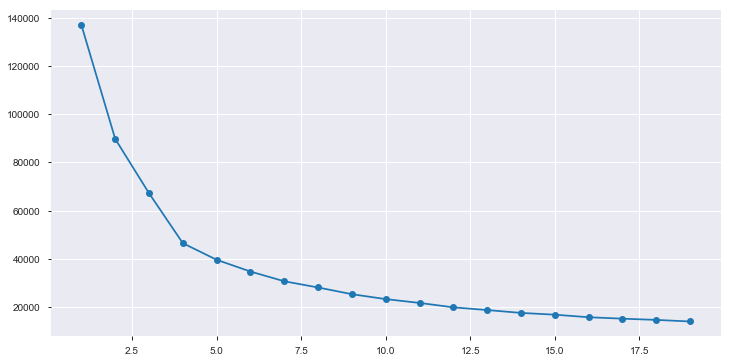

In [117]:
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [118]:
#the elbow diagram shows that the gain in explained variance reduces significantly from 4 to 5.so optimal number of cluster is 4 and 5
#the actual number of cluster chosen can be finally based on buisness context and convienience of dealing with number of segments or cluster

Silhouette Coefficient

In [120]:
from sklearn import metrics

In [122]:
k_range=range(3,9)
scores=[]
for k in k_range:
    km=KMeans(n_clusters=k,random_state=1)
    km.fit(reduced_cr)
    scores.append(metrics.silhouette_score(reduced_cr,km.labels_))

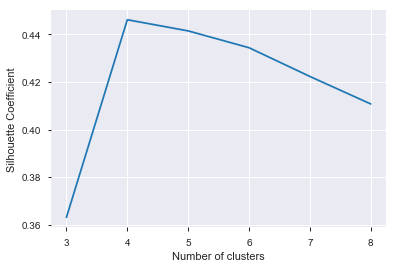

In [123]:
# plot the results
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

In [125]:
#profiling
seg_size=pd.DataFrame(size,columns=['Seg_size'])
seg_pct=pd.DataFrame(size/credit_final1.cluster_3.size,columns=['Seg_Pct'])
seg_size.T

,0,0,1,2,0,1,2,3,0,1,...,5,6,0,1,2,3,4,5,6,7
Seg_size,8950,3409,3345,2196,1875,2102,2756,2217,1862,929,...,1904,703,753,703,1140,2050,868,755,1502,1179


In [128]:
# Mean value gives a good indication of the distribution of data. So we are finding mean value for each variable for each cluster
Profiling_output = pd.concat([credit_final1.apply(lambda x: x.mean()).T, credit_final1.groupby('cluster_3').apply(lambda x: x.mean()).T, credit_final1.groupby('cluster_4').apply(lambda x: x.mean()).T,
          credit_final1.groupby('cluster_5').apply(lambda x: x.mean()).T, credit_final1.groupby('cluster_6').apply(lambda x: x.mean()).T,
          credit_final1.groupby('cluster_7').apply(lambda x: x.mean()).T, credit_final1.groupby('cluster_8').apply(lambda x: x.mean()).T], axis=1)

Profiling_output_final=pd.concat([seg_size.T, seg_pct.T, Profiling_output], axis=0)
#Profling_output_final.columns = ['Seg_' + str(i) for i in Profling_output_final.columns]
Profiling_output_final.columns = ['Overall', 'KM3_1', 'KM3_2', 'KM3_3',
                                'KM4_1', 'KM4_2', 'KM4_3', 'KM4_4',
                                'KM5_1', 'KM5_2', 'KM5_3', 'KM5_4', 'KM5_5',
                                'KM6_1', 'KM6_2', 'KM6_3', 'KM6_4', 'KM6_5','KM6_6',
                                'KM7_1', 'KM7_2', 'KM7_3', 'KM7_4', 'KM7_5','KM7_6','KM7_7',
                                'KM8_1', 'KM8_2', 'KM8_3', 'KM8_4', 'KM8_5','KM8_6','KM8_7','KM8_8',]

In [129]:
#Based on optimal cluster profiling we choose 4 or 5 cluster solution

In [131]:
# Mean value gives a good indication of the distribution of data. So we are finding mean value for each variable for each cluster
col=['CASH_ADVANCE_TRX','PURCHASES_TRX','PRC_FULL_PAYMENT','Monthly_avg_purchase','Monthly_cash_adv','Limit_usage','Payment_usage','d_both','d_INSTALLMENTS_PURCHASES','d_none','d_ONEOFF_PURCHASES']    
cluster4=credit_final1.groupby(['cluster_4']).apply(lambda x: x[col].mean()).T

In [132]:
cluster4

cluster_4,0,1,2,3
CASH_ADVANCE_TRX,0.731446,1.672960,0.649481,0.288343
PURCHASES_TRX,1.616648,0.030956,3.177155,2.302803
PRC_FULL_PAYMENT,0.078514,0.036380,0.143756,0.195674
Monthly_avg_purchase,3.473109,0.050842,4.778549,3.390490
Monthly_cash_adv,1.896954,4.495751,1.637131,0.833895
Limit_usage,0.290002,0.429917,0.277850,0.196992
Payment_usage,1.317329,1.135741,1.637323,1.254280
d_both,0.004267,0.002854,1.000000,0.001804
d_INSTALLMENTS_PURCHASES,0.000000,0.022360,0.000000,0.998196
d_none,0.000000,0.971456,0.000000,0.000000


In [134]:
#size of cluster4
credit_final1.cluster_4.value_counts()
credit_final

,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,PRC_FULL_PAYMENT,Monthly_avg_purchase,Monthly_cash_adv,Limit_usage,Payment_usage,d_INSTALLMENTS_PURCHASES,d_ONEOFF_PURCHASES,d_both,d_none
0,0.597837,0.000000,4.568506,0.154151,0.000000,0.080042,0.000000,0.000000,1.098612,0.000000,2.191654,0.000000,0.040086,0.894662,1,0,0,0
1,0.646627,0.000000,0.000000,0.000000,0.000000,0.000000,0.223144,1.609438,0.000000,0.200671,0.000000,6.287695,0.376719,1.574068,0,0,0,1
2,0.693147,6.651791,0.000000,0.693147,0.693147,0.000000,0.000000,0.000000,2.564949,0.000000,4.180994,0.000000,0.287197,0.688979,0,1,0,0
3,0.492477,7.313220,0.000000,0.080042,0.080042,0.000000,0.080042,0.693147,0.693147,0.000000,4.835620,2.898616,0.200671,0.000000,0,1,0,0
4,0.693147,2.833213,0.000000,0.080042,0.080042,0.000000,0.000000,0.000000,0.693147,0.000000,0.847298,0.000000,0.519644,1.327360,0,1,0,0
5,0.693147,0.000000,7.196147,0.510826,0.000000,0.459532,0.000000,0.000000,2.197225,0.000000,4.719451,0.000000,0.695874,0.458438,1,0,0,0
6,0.693147,8.764620,6.535793,0.693147,0.693147,0.693147,0.000000,0.000000,4.174387,0.693147,6.383367,0.000000,0.045417,3.498984,0,0,1,0
7,0.693147,0.000000,6.080391,0.693147,0.000000,0.693147,0.000000,0.000000,2.564949,0.000000,3.620333,0.000000,0.583830,0.822576,1,0,0,0
8,0.693147,6.496005,5.303305,0.287682,0.080042,0.223144,0.000000,0.000000,1.791759,0.000000,4.287590,0.000000,0.135395,1.165111,0,0,1,0
9,0.435318,7.156645,0.000000,0.154151,0.154151,0.000000,0.000000,0.000000,1.386294,0.000000,4.680278,0.000000,0.013744,2.534697,0,1,0,0


In [135]:
#percentage of each cluster
(credit_final1.cluster_4.value_counts()/credit_final.shape[0])*100

2    30.793296
3    24.770950
1    23.486034
0    20.949721
Name: cluster_4, dtype: float64

In [137]:
credit_final.shape[0]

8950

In [138]:
#behavior of cluster 5
col=['CASH_ADVANCE_TRX','PURCHASES_TRX','PRC_FULL_PAYMENT','Monthly_avg_purchase','Monthly_cash_adv','Limit_usage','Payment_usage','d_both','d_INSTALLMENTS_PURCHASES','d_none','d_ONEOFF_PURCHASES']    
cluster5=credit_final1.groupby(['cluster_5']).apply(lambda x: x[col].mean()).T

In [139]:
cluster5

cluster_5,0,1,2,3,4
CASH_ADVANCE_TRX,0.714539,2.113149,0.094530,0.171764,1.663703
PURCHASES_TRX,1.612164,2.975977,3.217078,2.288779,0.022359
PRC_FULL_PAYMENT,0.078404,0.033248,0.188122,0.204832,0.036516
Monthly_avg_purchase,3.468231,4.461045,4.851665,3.367409,0.034815
Monthly_cash_adv,1.870550,4.953271,0.350942,0.580344,4.485250
Limit_usage,0.289043,0.462268,0.206631,0.179820,0.429519
Payment_usage,1.316320,1.166560,1.817906,1.266556,1.136061
d_both,0.003759,0.854682,1.000000,0.000000,0.000000
d_INSTALLMENTS_PURCHASES,0.000000,0.132400,0.000000,1.000000,0.019617
d_none,0.000000,0.000000,0.000000,0.000000,0.977033


In [140]:
#there is a group of customers with highest average purchase but there is cluster 1 having highest cash purchase but their types of purchases similar
#segment1 and segment 4 are behaving in similar manner in terms of limit usage and customers of these clusters are higher in cash transaction